In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [159]:
data=pd.read_excel('heart_disease.xlsx',sheet_name=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [160]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [161]:
data.oldpeak.unique()

array([ 2.3,  0. ,  0.4,  1.5,  1. ,  nan,  2.6,  0.5,  1.2,  3.5,  1.4,
        1.1,  0.6,  2. ,  1.6,  0.1,  0.3,  1.3,  0.2,  2.4,  1.8,  3. ,
        0.8,  1.9,  0.9,  0.7,  4.2, -0.5, -0.1, -1.1,  2.1,  3.6,  1.7,
        3.1,  2.2,  2.5,  2.8, -1.5, -0.9, -2.6, -0.8,  4. ,  5. , -1. ,
        3.4, -2. , -0.7,  3.2,  6.2,  5.6,  2.9,  3.7,  4.4,  3.8])

In [162]:
data[data.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
764,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [163]:
data_cleaned=data.drop_duplicates()

In [164]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   845 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 93.0+ KB


In [165]:
data_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


<Axes: >

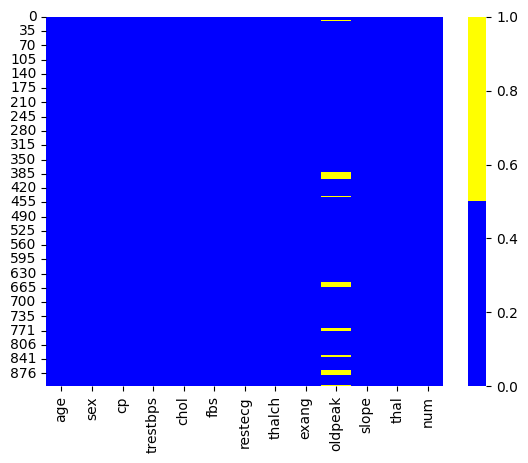

In [166]:
cols=data_cleaned.columns
colours = ['blue', 'yellow']
sns.heatmap(data_cleaned[cols].isnull(),cmap=colours)

In [167]:
mean=data_cleaned['oldpeak'].mean()
mean

np.float64(0.8923076923076924)

In [168]:
data_cleaned['oldpeak']=data_cleaned['oldpeak'].fillna(mean)

C:\Users\revan\AppData\Local\Temp\ipykernel_50936\387710925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['oldpeak']=data_cleaned['oldpeak'].fillna(mean)


In [169]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 93.0+ KB


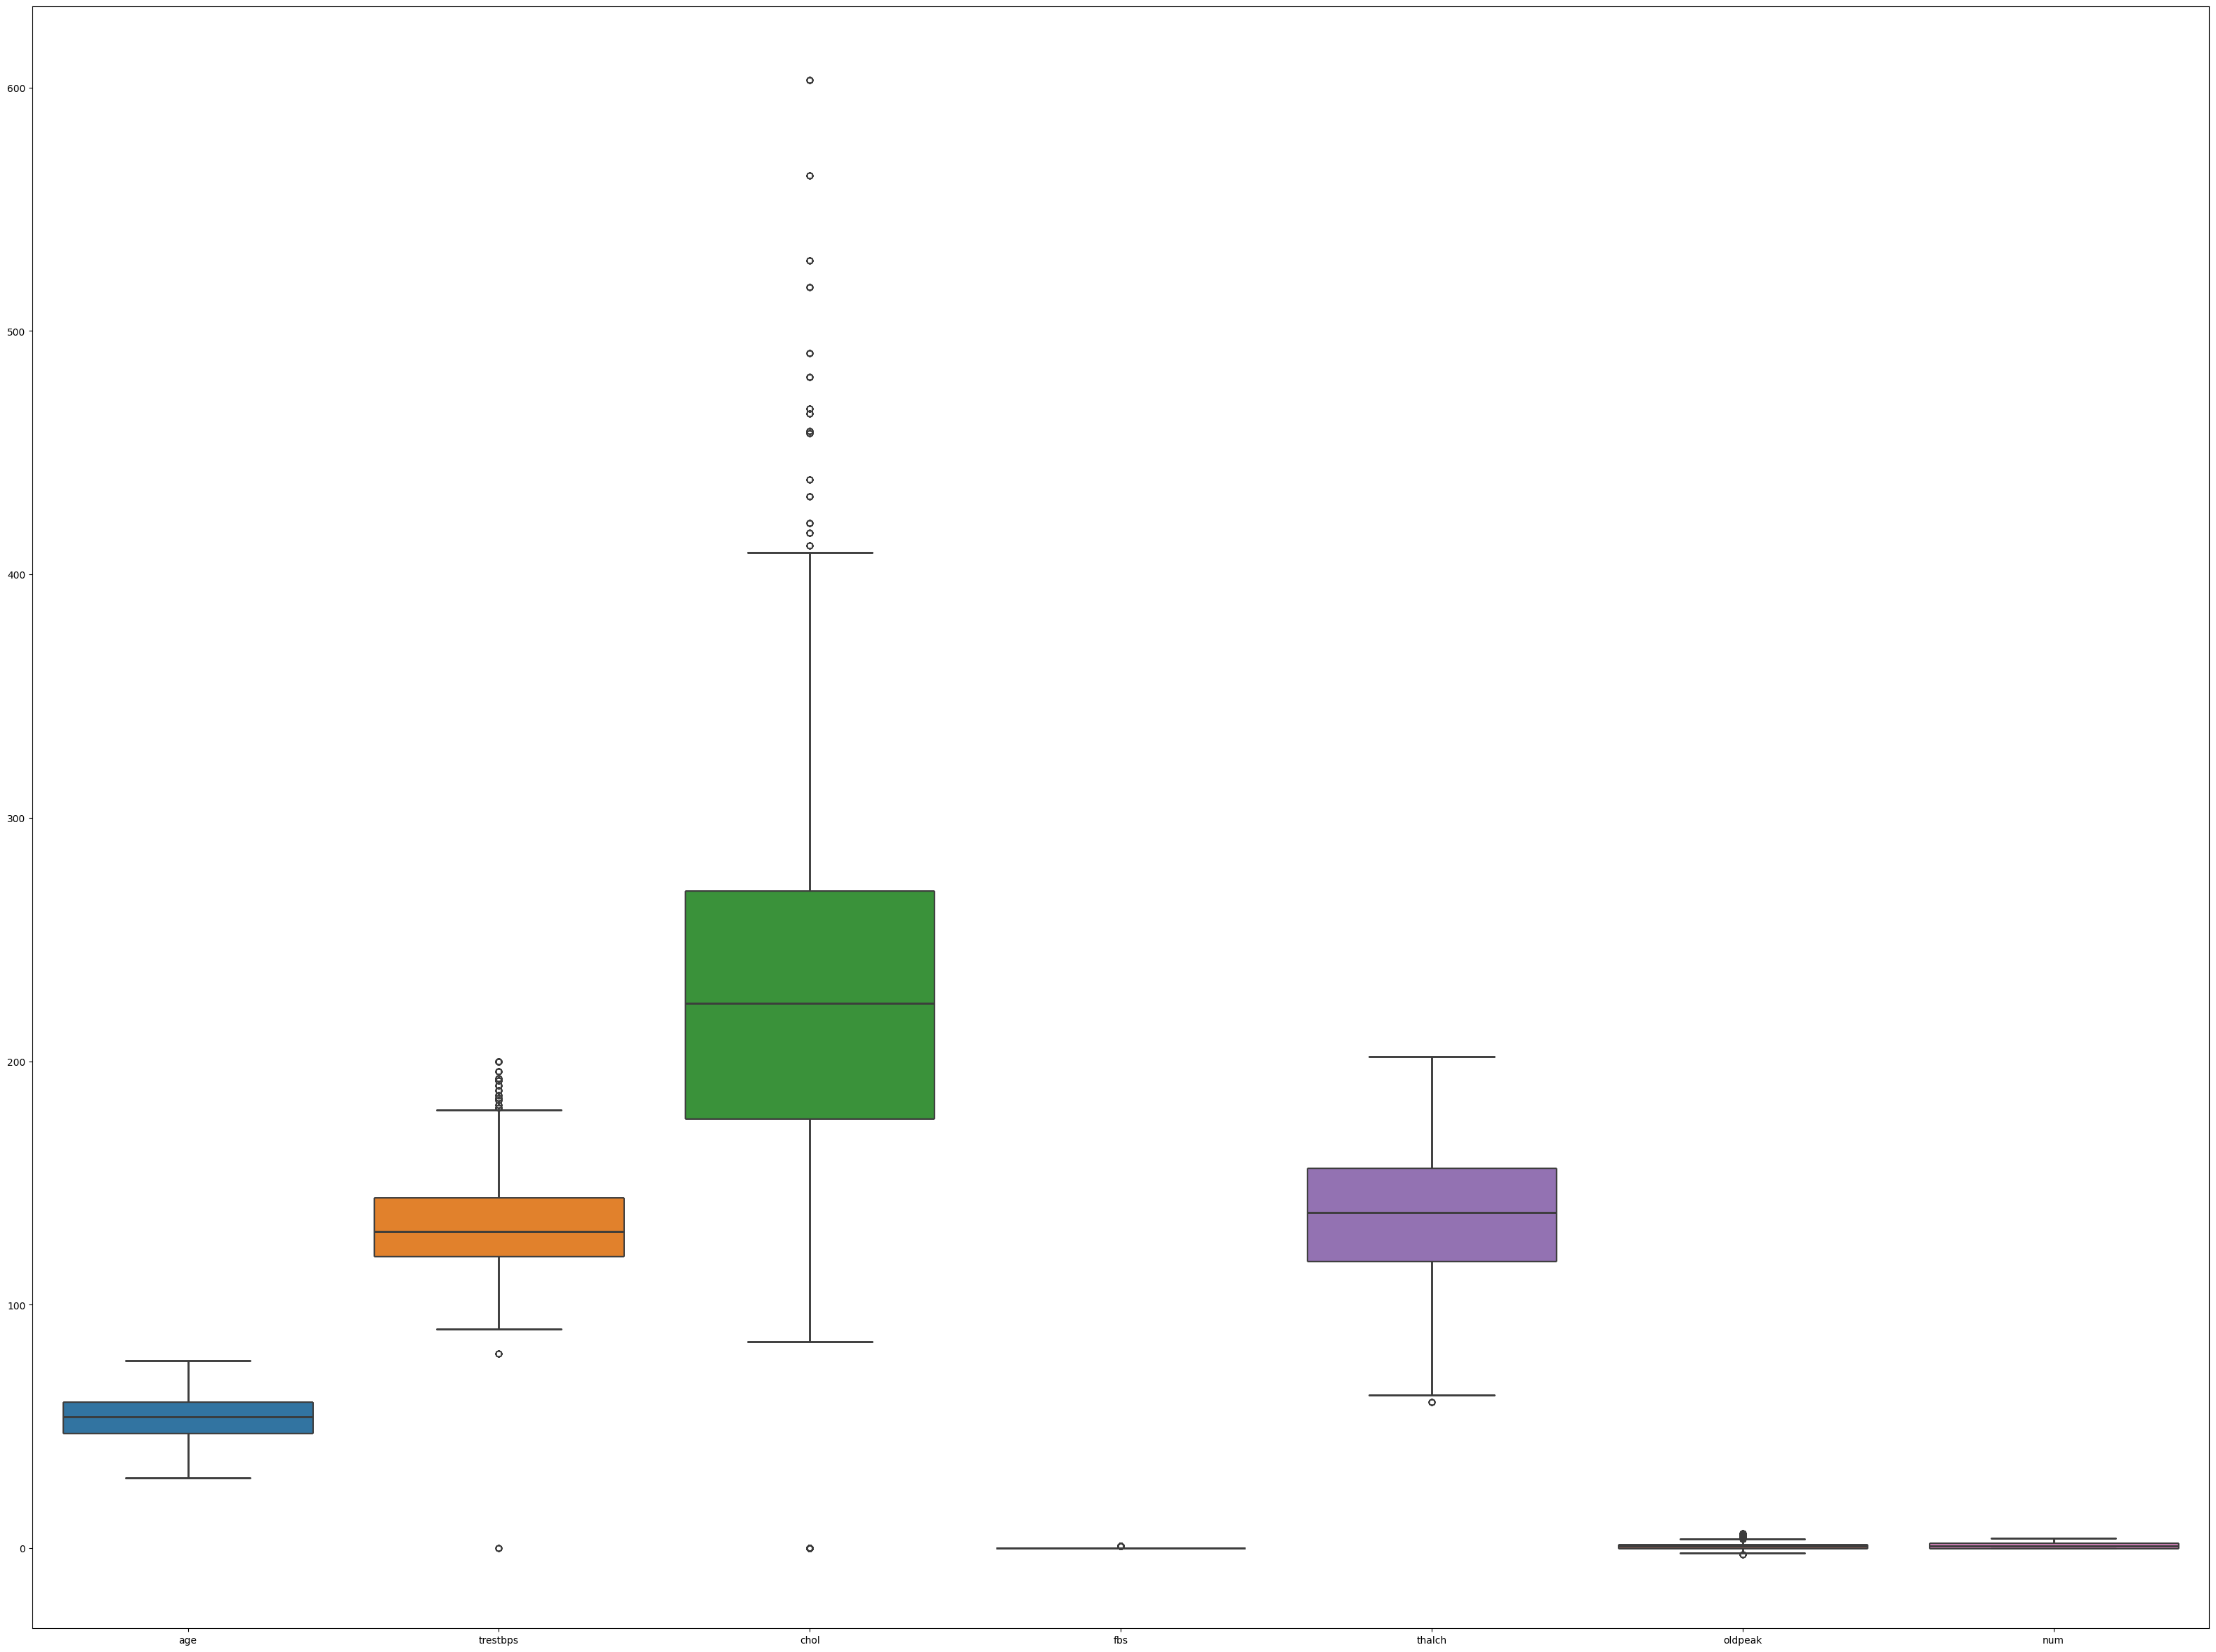

In [170]:
plt.figure(figsize=(40,30))
for i,column in enumerate(data_cleaned.columns,1):
    sns.boxplot(data=data_cleaned)

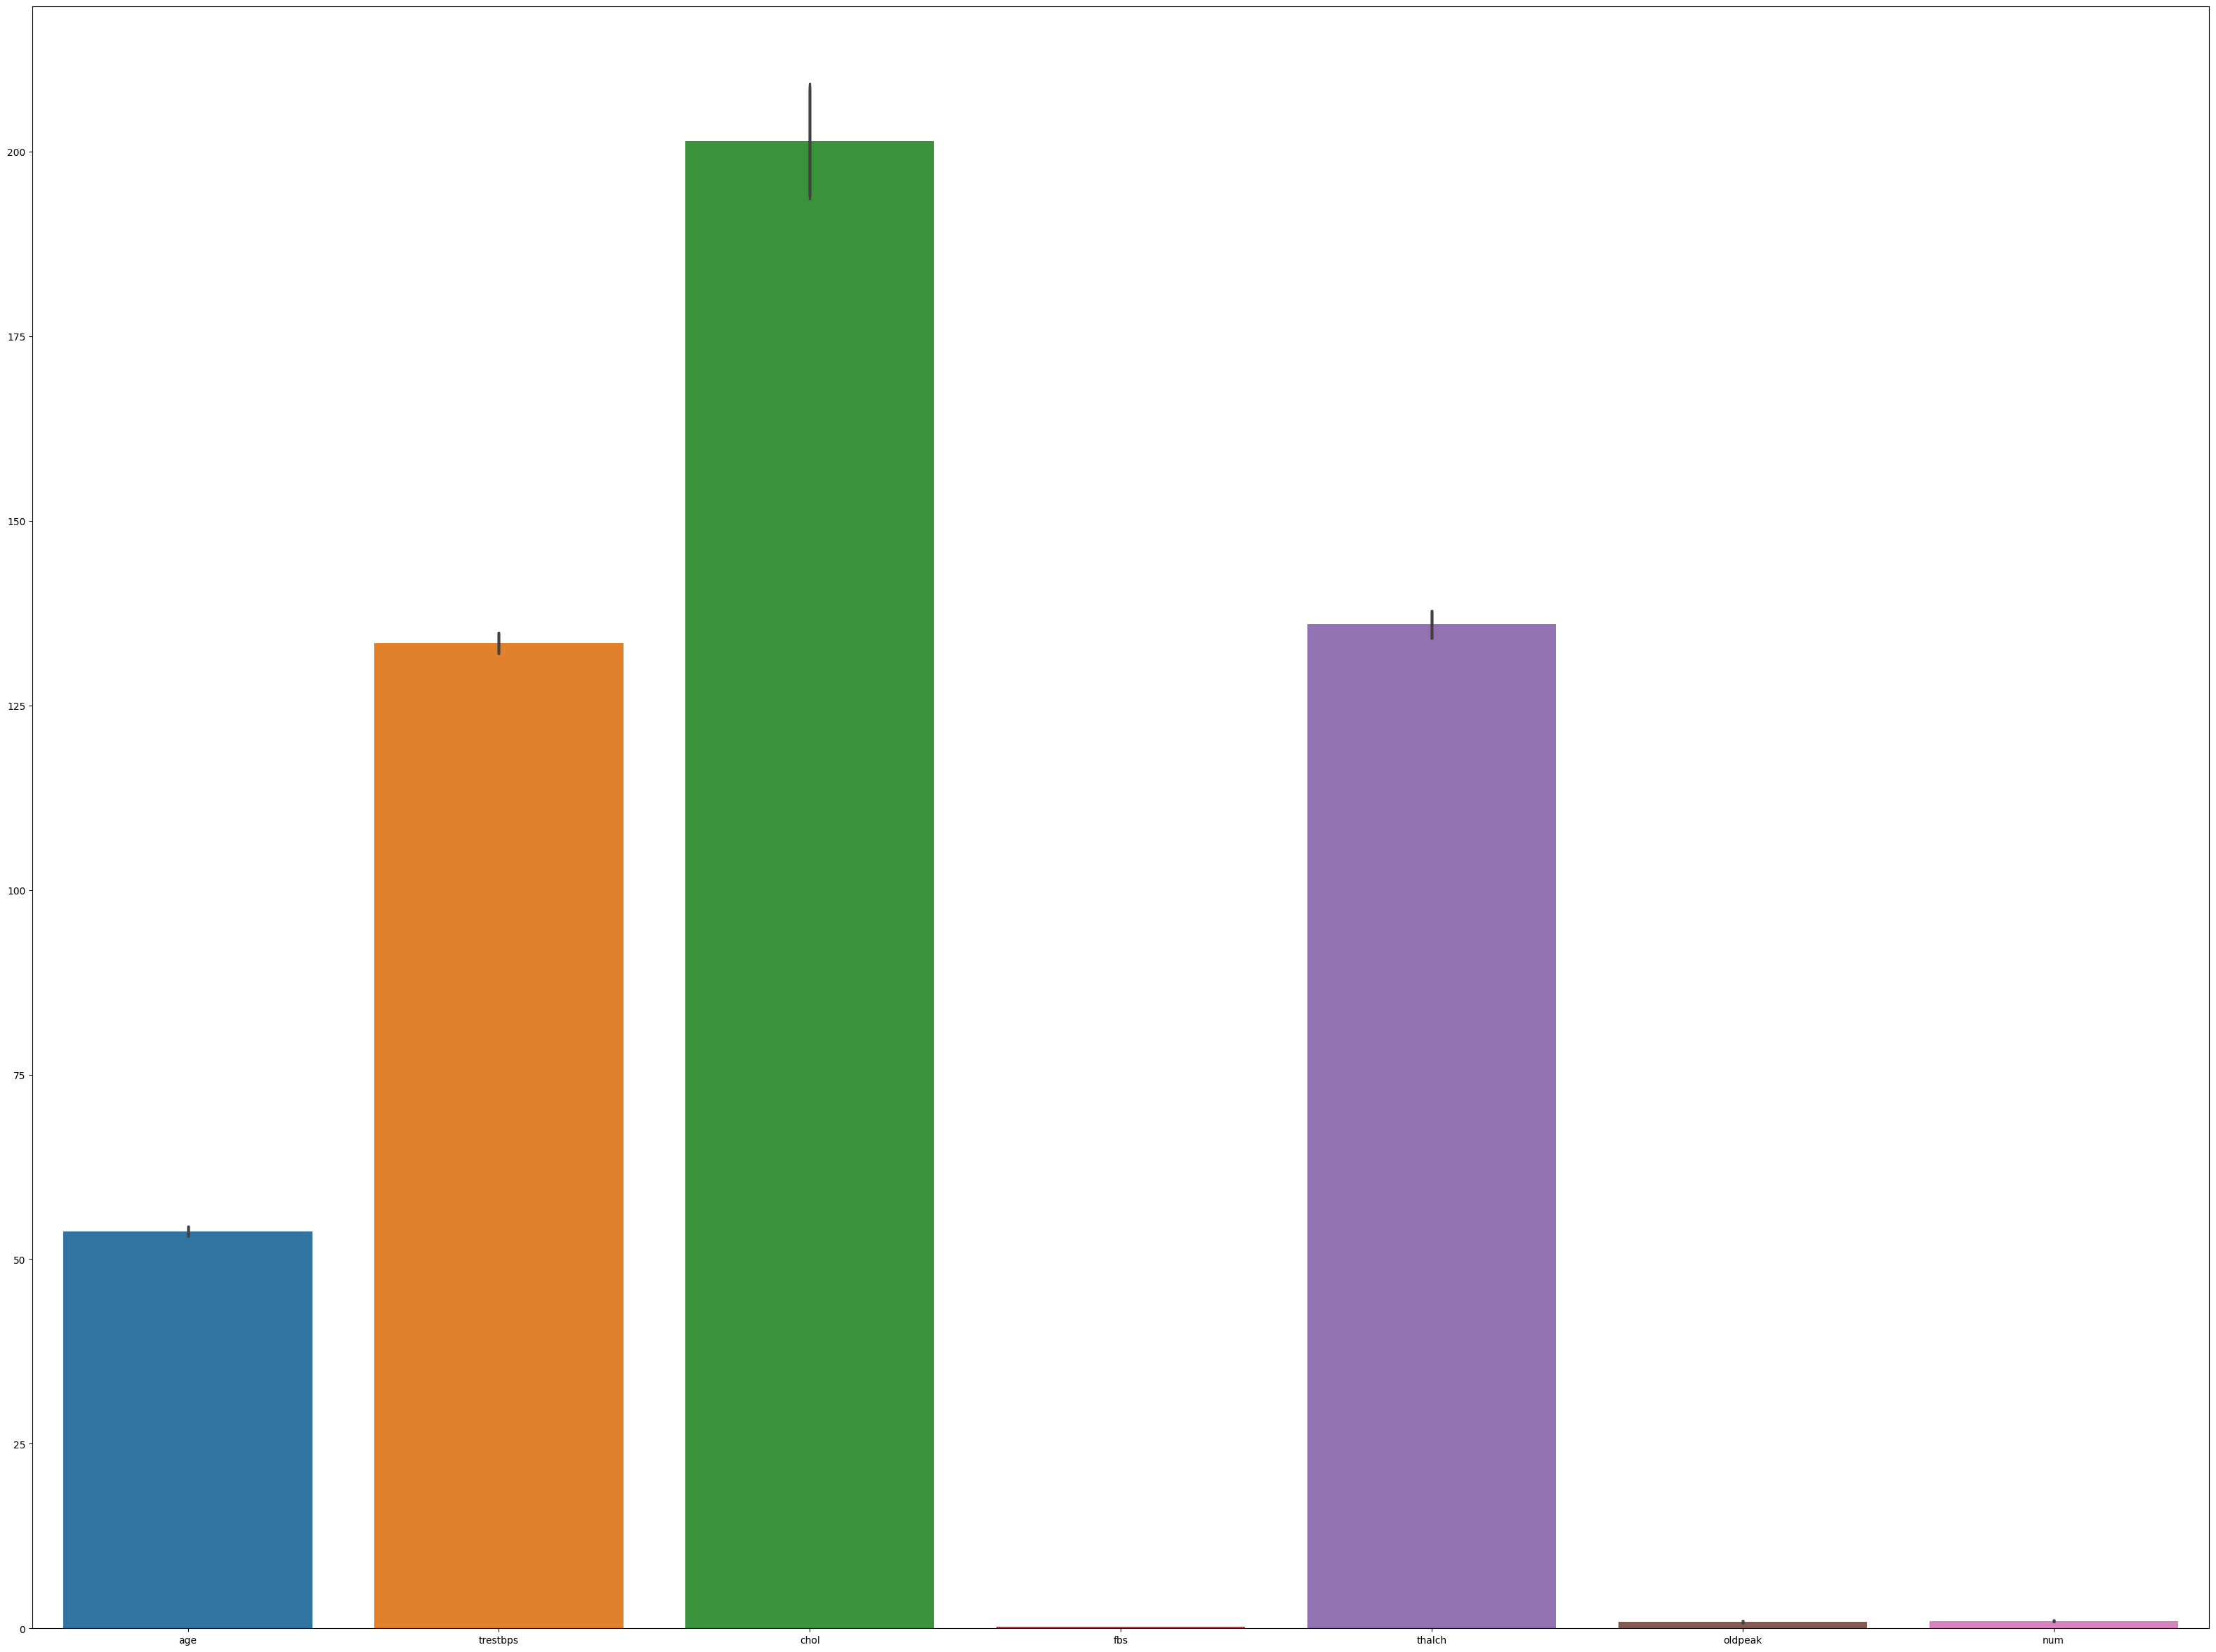

In [171]:
plt.figure(figsize=(40,30))
for i,column in enumerate(data_cleaned.columns,1):
    sns.barplot(data=data_cleaned)

In [172]:
data_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.892308,downsloping,fixed defect,4


In [173]:
label_encoder=preprocessing.LabelEncoder()
data_cleaned['cp']=label_encoder.fit_transform(data_cleaned['cp'])
data_cleaned.cp.unique()

C:\Users\revan\AppData\Local\Temp\ipykernel_50936\1545071151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['cp']=label_encoder.fit_transform(data_cleaned['cp'])


array([3, 1, 0, 2])

In [174]:
x=data_cleaned.iloc[:,0:2]
y=data_cleaned['cp']

In [175]:
x

,age,sex
0,63,Male
1,41,Male
2,57,Male
3,52,Male
4,57,Male
...,...,...
903,53,Male
904,62,Male
905,56,Male
906,56,Male


In [176]:
encode_data=pd.get_dummies(data_cleaned,columns=['sex','cp','restecg','exang','slope','thal'])
encode_data=encode_data.astype(int)
encode_data

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_0,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,1,150,2,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,41,135,203,0,132,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,57,140,192,0,148,0,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
3,52,118,186,0,190,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
4,57,110,201,0,126,1,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,0,120,1,4,0,1,1,...,1,0,0,0,0,0,1,0,0,1
904,62,166,170,0,120,3,4,0,1,1,...,0,1,0,0,0,1,0,0,0,1
905,56,170,0,0,123,2,4,0,1,0,...,0,1,0,0,1,0,0,0,1,0
906,56,144,208,1,105,0,4,0,1,0,...,0,0,0,1,1,0,0,1,0,0


In [177]:
encode_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       907 non-null    int64
 1   trestbps                  907 non-null    int64
 2   chol                      907 non-null    int64
 3   fbs                       907 non-null    int64
 4   thalch                    907 non-null    int64
 5   oldpeak                   907 non-null    int64
 6   num                       907 non-null    int64
 7   sex_Female                907 non-null    int64
 8   sex_Male                  907 non-null    int64
 9   cp_0                      907 non-null    int64
 10  cp_1                      907 non-null    int64
 11  cp_2                      907 non-null    int64
 12  cp_3                      907 non-null    int64
 13  restecg_lv hypertrophy    907 non-null    int64
 14  restecg_normal            907 non-null    int64

In [178]:
data2=encode_data.copy()
x=data2.drop(columns=['num'])
y=data2['num']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [179]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [180]:
prdeict=model.predict(x_test)
prdeict

array([0, 1, 0, 1, 2, 1, 3, 0, 1, 0, 2, 3, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1,
       1, 1, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 3, 3, 2, 0, 1, 4, 0, 3, 0,
       3, 0, 1, 0, 0, 1, 1, 1, 4, 0, 0, 0, 4, 0, 1, 3, 1, 0, 3, 1, 0, 1,
       3, 2, 3, 1, 0, 3, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       3, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 0, 0, 1, 1, 3, 0, 2, 1, 1, 1, 1,
       0, 0, 3, 3, 0, 2, 1, 1, 2, 0, 1, 0, 0, 3, 1, 1, 0, 1, 2, 3, 0, 0,
       1, 1, 3, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 3, 0, 1, 0, 2, 3, 4, 1, 0, 1, 1, 0, 0, 0, 1,
       2, 1, 3, 3, 3, 0])

In [181]:
acc=model.score(x_test,y_test)
acc

0.5274725274725275

# Train the model on the training set and evaluate its performance 

In [182]:
classification_report(y_test,prdeict)

'              precision    recall  f1-score   support\n\n           0       0.79      0.74      0.76        89\n           1       0.43      0.49      0.46        47\n           2       0.12      0.10      0.11        20\n           3       0.20      0.29      0.24        17\n           4       0.00      0.00      0.00         9\n\n    accuracy                           0.53       182\n   macro avg       0.31      0.33      0.31       182\nweighted avg       0.53      0.53      0.53       182\n'

In [183]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [184]:
acc=accuracy_score(y_test,prdeict)
acc

0.5274725274725275

In [185]:
precision_score(y_test,prdeict,average='weighted')

np.float64(0.5287076804597021)

In [186]:
recall_score(y_test,prdeict,average='weighted')

np.float64(0.5274725274725275)

In [187]:
f1_score(y_test,prdeict,average='weighted')

np.float64(0.5263590973665293)

In [188]:
roc_auc_score(y_test,model.predict_proba(x_test),average='weighted',multi_class='ovr')

np.float64(0.6767380645496126)

# Hyper tuning and Model Evaluation Analysis

In [189]:
grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [190]:
from sklearn.model_selection import GridSearchCV

In [191]:
dtc=DecisionTreeClassifier(random_state=42)

In [192]:
gridSearch=GridSearchCV(dtc,grid,cv=5,scoring='accuracy')

In [193]:
gridSearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [194]:
gridSearch.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

In [195]:
gridSearch.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=42)

In [196]:
accuracy_score(y_test,gridSearch.best_estimator_.predict(x_test))

0.5769230769230769

In [197]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [198]:
fn= list(data_cleaned.columns)
fn.remove('num')

In [199]:
col=data2['num'].unique().tolist()
col

[0, 1, 2, 3, 4]

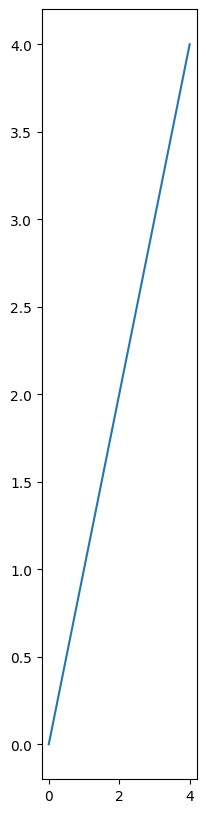

In [202]:
plt.figure(figsize=(2,10))
plt.plot(col)

# Interview Questions

What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Max Depth: Limits how deep the tree can go. A deeper tree can capture more details but might overfit the data.

Min Samples Split: The minimum number of samples needed to split a node. Higher values prevent the tree from splitting too soon, reducing overfitting.

Criterion: The method to measure the quality of a split (e.g., Gini impurity or entropy). The choice depends on the data and problem.

Min Samples Leaf: The minimum number of samples required at a leaf node. Higher values can prevent overfitting by ensuring leaves aren't too small.

Max Features: The number of features to consider when looking for the best split. Limiting this can reduce complexity and improve generalization.

What is the difference between the Label encoding and One-hot encoding?

Label Encoding: Converts categories to numbers (e.g., "Male" = 0, "Female" = 1). It's simple but can imply an order that doesn't exist . It is used only on target variables for convertion to numbers.

One-Hot Encoding: Converts categories to binary vectors (e.g., "Male" = [1, 0], "Female" = [0, 1]). It avoids implying any order but can create many columns if there are many categories.We can use it in both Feature and target variable as well for convertion